In [2]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:

# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/Car details.csv')

In [5]:
# printing first few rows of th dataset
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [7]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
 #checking the number of missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [10]:
# encoding "fuel" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3, 'Electric':4}},inplace=True)

# encoding "seller_Type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner" Column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [11]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


In [12]:
# Splitting main data(selling_price)
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [13]:
print(X)

      year  km_driven fuel seller_type transmission owner
0     2007      70000    0           1            0     0
1     2007      50000    0           1            0     0
2     2012     100000    1           1            0     0
3     2017      46000    0           1            0     0
4     2014     141000    1           1            0     1
...    ...        ...  ...         ...          ...   ...
4335  2014      80000    1           1            0     1
4336  2014      80000    1           1            0     1
4337  2009      83000    0           1            0     1
4338  2016      90000    1           1            0     0
4339  2016      40000    0           1            0     0

[4340 rows x 6 columns]


In [14]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [15]:
# splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


In [16]:
#train the model(Linear Regression)
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [18]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.42333105707286967


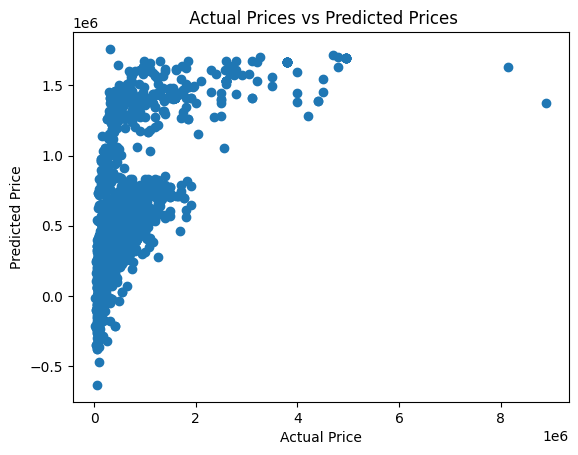

In [20]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [21]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [22]:
 #R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4847632807653801


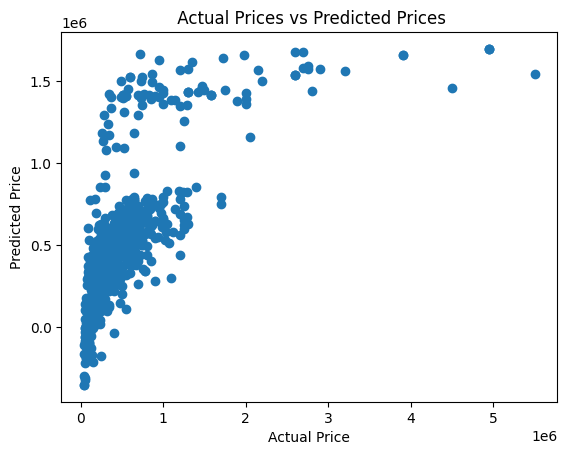

In [23]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
regressor= LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
Y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Values':Y_test, 'Predicted Values':Y_pred})
print(df)

      Actual Values  Predicted Values
1149         625000      4.789462e+05
2245         520000      1.415437e+06
4261         115999      1.839028e+05
2865        2000000      1.390740e+06
3110         707000      7.165840e+05
...             ...               ...
2168         100000      3.476759e+05
3783         650000      9.366282e+05
1683         430000      5.462716e+05
2420         100000      5.312790e+05
3354         300000      5.321506e+05

[868 rows x 2 columns]


Model Evaluation


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

# get the predicted values for test dat
Y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("mse", mse)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
print("rsme", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("mae", mae)
r2 = r2_score(Y_test, Y_pred)
print("r2", r2)

mse 167432160004.12747
rsme 409184.7504540308
mae 224500.16836343252
r2 0.4847632807653801
